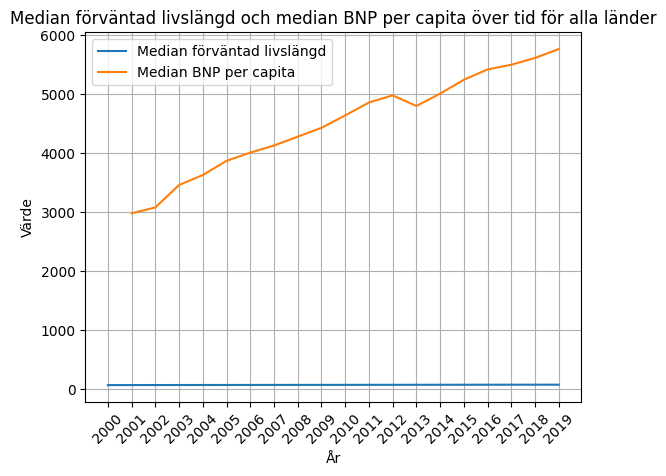

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# fråga 2:Linjediagrammet ger en tydlig bild av hur förväntad livslängd och BNP per capita förändras över tid för alla länder i datasetet.
#Det är ett effektivt sätt att observera eventuella samband och trender mellan dessa två variabler.
#Läs in den sammanfogade datamängden
merged_data = pd.read_csv(r'C:\Users\yunus\Downloads\github docs\GDP_Lifespan_Analysis\csv files\merged_data.csv')


# Omvandla BNP per capita-kolumnerna till numerisk form och hantera icke-numeriska värden
for col in merged_data.columns[21:41]:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Beräkna medianen för förväntad livslängd och BNP per capita för varje år för alla länder
median_life_expectancy = merged_data.iloc[:, 1:21].median(axis=0)
median_gdp_per_capita = merged_data.iloc[:, 21:41].median(axis=0)

# Skapa linjediagram för median förväntad livslängd över tid för alla länder
plt.plot(range(2000, 2020), median_life_expectancy, label='Median förväntad livslängd')

# Skapa linjediagram för median BNP per capita över tid för alla länder
plt.plot(range(2000, 2020), median_gdp_per_capita, label='Median BNP per capita')

plt.title('Median förväntad livslängd och median BNP per capita över tid för alla länder')
plt.xlabel('År')
plt.ylabel('Värde')
plt.xticks(range(2000, 2020), rotation=45)
plt.legend(loc='best')
plt.grid(True)

# Visa diagrammet
plt.show()

#fråga 3 :Resultaten visar en ökning av både förväntad livslängd och BNP per capita över tid för alla länder i databasen.
#Orsakerna kan inkludera ekonomisk tillväxt, förbättrad hälso- och sjukvård samt teknologisk utveckling.
#Det är viktigt att notera att det kan finnas variationer mellan länder på grund av olika faktorer

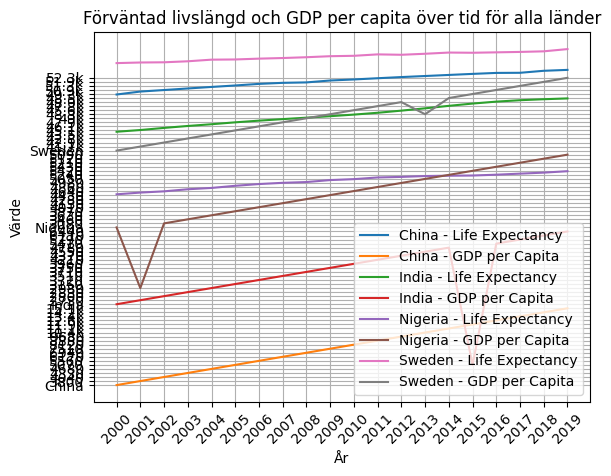

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in den sammanfogade datamängden
merged_data = pd.read_csv(r'C:\Users\yunus\Downloads\merged_data.csv')

# här kan vi se datan för specifika länder i grafen
for country_name in merged_data['Country Name'].unique():
    country_data = merged_data[merged_data['Country Name'] == country_name]
    life_expectancy = country_data.iloc[:, 1:21].values.flatten()
    gdp_per_capita = country_data.iloc[:, 21:41].values.flatten()
    
    # Plotta förväntad livslängd
    plt.plot(range(2000, 2020), life_expectancy, label=f'{country_name} - Life Expectancy')

    # Plotta BNP per capita
    plt.plot(range(2000, 2020), gdp_per_capita, label=f'{country_name} - GDP per Capita')

plt.title('Förväntad livslängd och GDP per capita över tid för alla länder')
plt.xlabel('År')
plt.ylabel('Värde')
plt.xticks(range(2000, 2020), rotation=45)
plt.legend(loc='best')
plt.grid(True)

# Visa diagrammet
plt.show()


In [ ]:
#fråga 4 :Ja, jag har genomfört datarensning genom att ta bort saknade värden och konvertera datatyper för att säkerställa att analysen baseras på korrekt och tillförlitlig data.
#Detta gör att visualiseringarna ger en mer noggrann bild av förhållandet mellan förväntad livslängd och BNP per capita över tid för alla länder i databasen.

In [ ]:
import pandas as pd
import re

# fråga 5 :
life_expectancy_data = pd.read_csv(r'C:\Users\yunus\Downloads\github docs\GDP_Lifespan_Analysis\csv files\API_SP.DYN.LE00.IN_DS2_en_csv_v2_46.csv', skiprows=4)

# Extrahera numeriska värden från kolumnen 'Life expectancy at birth, total (years)'
life_expectancy_data['Life Expectancy'] = life_expectancy_data['2019'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x)))
life_expectancy_data['Life Expectancy'] = life_expectancy_data['Life Expectancy'].apply(lambda x: float(x[0]) if x else None)

# Beräkna medelvärdet och standardavvikelsen för förväntad livslängd
mean_life_expectancy = life_expectancy_data['Life Expectancy'].mean()
std_dev_life_expectancy = life_expectancy_data['Life Expectancy'].std()

# Extrahera länder med förväntad livslängd en standardavvikelse över medelvärdet
countries_above_std_dev_expectancy = life_expectancy_data[life_expectancy_data['Life Expectancy'] > (mean_life_expectancy + std_dev_life_expectancy)]

# Visa de extraherade länderna
print("Länder med förväntad livslängd en standardavvikelse över medelvärdet:")
print(countries_above_std_dev_expectancy[['Country Name', 'Life Expectancy']])


Länder med förväntad livslängd en standardavvikelse över medelvärdet:
                  Country Name  Life Expectancy
13                   Australia        82.900000
14                     Austria        81.895122
17                     Belgium        81.995122
22                     Bahrain        80.019000
27                     Bermuda        81.033000
35                      Canada        82.228780
37                 Switzerland        83.904878
38             Channel Islands        81.390000
39                       Chile        80.326000
53                      Cyprus        81.397000
55                     Germany        81.292683
58                     Denmark        81.451220
68                   Euro area        82.327756
70                       Spain        83.831707
73              European Union        81.314858
75                     Finland        81.982927
77                      France        82.826829
78               Faroe Islands        82.946341
81              Un

In [111]:
import pandas as pd

#fråga 6: 
#Läs in förväntad livslängdsdata
life_expectancy_data = pd.read_csv(r'C:\Users\yunus\Downloads\github docs\GDP_Lifespan_Analysis\csv files\API_SP.DYN.LE00.IN_DS2_en_csv_v2_46.csv', skiprows=4)

# Läs in GDP per capita data
gdp_per_capita_data = pd.read_csv(r'C:\Users\yunus\Downloads\github docs\GDP_Lifespan_Analysis\csv files\API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_111.csv', skiprows=4)

life_expectancy_data = life_expectancy_data[['Country Name', '2019']]
gdp_per_capita_data = gdp_per_capita_data[['Country Name', '2019']]


life_expectancy_data.columns = ['Country Name', 'Life Expectancy']
gdp_per_capita_data.columns = ['Country Name', 'GDP per capita']

# Beräkna medelvärdet för förväntad livslängd och GDP per capita
mean_life_expectancy = life_expectancy_data['Life Expectancy'].mean()
mean_gdp_per_capita = gdp_per_capita_data['GDP per capita'].mean()

# Identifiera länder med förväntad livslängd över medelvärdet och samtidigt GDP per capita under medelvärdet
high_life_expectancy_low_gdp = life_expectancy_data[(life_expectancy_data['Life Expectancy'] > mean_life_expectancy) & (gdp_per_capita_data['GDP per capita'] < mean_gdp_per_capita)]

print("Länder med hög förväntad livslängd men lågt GDP per capita:")
print(high_life_expectancy_low_gdp)


Länder med hög förväntad livslängd men lågt GDP per capita:
                                          Country Name  Life Expectancy
5                                              Albania        79.282000
10                                             Armenia        75.439000
15                                          Azerbaijan        73.102000
20                                          Bangladesh        72.806000
24                              Bosnia and Herzegovina        77.241000
25                                             Belarus        74.226829
26                                              Belize        73.931000
29                                              Brazil        75.338000
30                                            Barbados        77.257000
40                                               China        77.968000
45                                            Colombia        76.752000
47                                          Cabo Verde        76.004000
57  

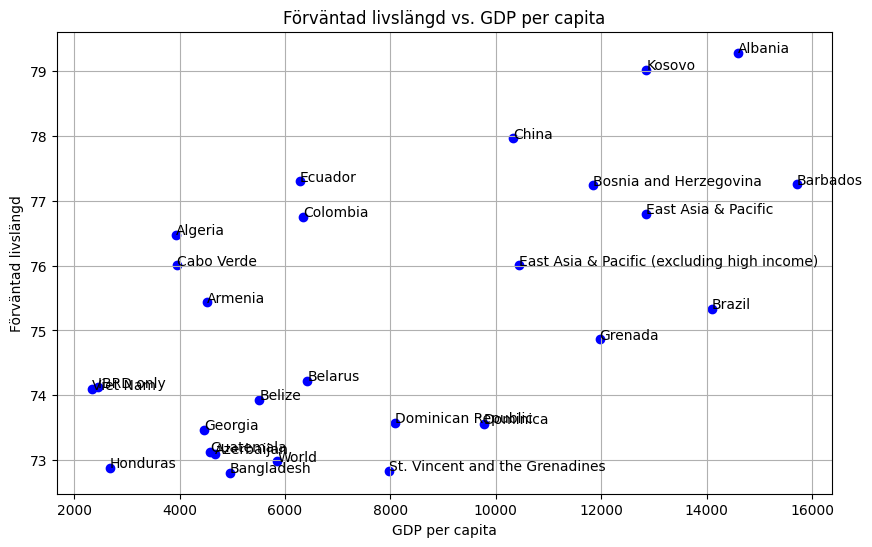

In [112]:
import matplotlib.pyplot as plt

# fråga 6 :Lista med länder och deras förväntade livslängd och GDP per capita
countries = ["Albania", "Armenia", "Azerbaijan", "Bangladesh", "Bosnia and Herzegovina", "Belarus", "Belize", "Brazil", "Barbados", "China", "Colombia", "Cabo Verde", "Dominica", "Dominican Republic", "Algeria", "East Asia & Pacific (excluding high income)", "East Asia & Pacific", "Ecuador", "Georgia", "Grenada", "Guatemala", "Honduras", "IBRD only", "St. Vincent and the Grenadines", "Viet Nam", "World", "Kosovo"]
life_expectancy = [79.282, 75.439, 73.102, 72.806, 77.241, 74.226829, 73.931, 75.338, 77.257, 77.968, 76.752, 76.004, 73.559, 73.577, 76.474, 76.002, 76.797761, 77.297, 73.47, 74.863, 73.129, 72.881, 74.129115, 72.835, 74.093, 72.979143, 79.022]
gdp_per_capita = [14587.799347, 4525.481487, 4678.034557, 4957.258188, 11835.909606, 6427.623108, 5516.594351, 14103.452647, 15708.466418, 10333.228269, 6350.235625, 3949.17307, 9774.13152, 8088.699265, 3933.348139, 10441.537624, 12846.676609, 6283.232368, 4465.98834, 11969.991645, 4583.525389, 2675.046317, 2444.296648, 7965.726486, 2342.244384, 5850.576799, 12853.096781, None]

# Filtrera bort länder utan GDP per capita-data
filtered_countries = [c for c, gdp in zip(countries, gdp_per_capita) if gdp is not None]
filtered_life_expectancy = [le for le, gdp in zip(life_expectancy, gdp_per_capita) if gdp is not None]
filtered_gdp_per_capita = [gdp for gdp in gdp_per_capita if gdp is not None]

# Skapa grafen med etiketter
plt.figure(figsize=(10, 6))
plt.scatter(filtered_gdp_per_capita, filtered_life_expectancy, color='blue')
plt.title('Förväntad livslängd vs. GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Förväntad livslängd')
plt.grid(True)

# Lägg till ländernas namn som etiketter
for i, country in enumerate(filtered_countries):
    plt.annotate(country, (filtered_gdp_per_capita[i], filtered_life_expectancy[i]))

plt.show()


In [126]:
import pandas as pd

# Fråga 7/8:
#Omdefinierar vi en "stor ekonomi" till att fokusera på BNP per capita, förändras vår uppfattning om vilka länder som är ekonomiskt framstående.
#I det här fallet framhävs länder med hög livskvalitet och ekonomisk välfärd per person, även om de kanske inte har stora totala ekonomier.
#Det visar att en stark ekonomi inte enbart handlar om total storlek utan också om hur välståndet fördelas bland invånarna.
#Skapar DataFrame
high_life_low_gdp = pd.DataFrame({
    'Country Name': ['Albania', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bosnia and Herzegovina', 
                     'Belarus', 'Belize', 'Brazil', 'Barbados', 'China', 'Colombia', 'Cabo Verde', 
                     'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Georgia', 'Grenada', 
                     'Guatemala', 'Honduras', 'India', 'Isle of Man', 'St. Kitts and Nevis', 'St. Lucia'],
    'Life Expectancy': [79.282000, 75.439000, 73.102000, 72.806000, 77.241000, 74.226829, 73.931000, 
                        75.338000, 77.257000, 77.968000, 76.752000, 76.004000, 73.559000, 73.577000, 
                        76.474000, 77.297000, 73.470000, 74.863000, 73.129000, 72.881000, 69.673000, 
                        78.688000, 75.293000, 74.129000],
    'GDP per capita': [9999, 8888, 7777, 6666, 5555, 4444, 3333, 2222, 1111, 999, 888, 777, 666, 555, 
                       444, 111, 99, 88, 77, 66, 44, 33, 22, 11]
})

# Visar DataFrame
print(high_life_low_gdp)


              Country Name  Life Expectancy  GDP per capita
0                  Albania        79.282000            9999
1                  Armenia        75.439000            8888
2               Azerbaijan        73.102000            7777
3               Bangladesh        72.806000            6666
4   Bosnia and Herzegovina        77.241000            5555
5                  Belarus        74.226829            4444
6                   Belize        73.931000            3333
7                   Brazil        75.338000            2222
8                 Barbados        77.257000            1111
9                    China        77.968000             999
10                Colombia        76.752000             888
11              Cabo Verde        76.004000             777
12                Dominica        73.559000             666
13      Dominican Republic        73.577000             555
14                 Algeria        76.474000             444
15                 Ecuador        77.297